In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
import math
import random

from nnfs.datasets import spiral_data, vertical_data, sine_data

from model import Model
from layers import Dense, Dropout
from activations import ReLU, SoftMax, Sigmoid, Linear
from losses import CategoricalCrossEntropy, Softmax_CategoricalCrossentropy, BinaryCrossentropy, MeanAbsoluteError, MeanSquaredError
from optimizers import SGD, AdaGrad, RMSProp, Adam
from metrics import Accuracy_Regression, Accuracy_Categorical

In [3]:
nnfs.init()

## CH 18: Model Object

In [4]:
X, y = spiral_data(samples=1000, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

# y = y.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

In [12]:
model = Model()
model.add(Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(ReLU())
model.add(Dropout(0.1))
model.add(Dense(512, 3))
model.add(SoftMax())

In [13]:
model.set(loss=CategoricalCrossEntropy(), optimizer=Adam(learning_rate=0.05, decay=5e-5), accuracy=Accuracy_Categorical())

In [14]:
model.finalize()

In [15]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.719, loss: 0.7331, data_loss: 0.6762, reg_loss: 0.0570, lr: 0.04975371909050202
epoch: 200, acc: 0.773, loss: 0.6229, data_loss: 0.5488, reg_loss: 0.0741, lr: 0.049507401356502806
epoch: 300, acc: 0.794, loss: 0.5953, data_loss: 0.5194, reg_loss: 0.0759, lr: 0.0492635105177595
epoch: 400, acc: 0.819, loss: 0.5489, data_loss: 0.4717, reg_loss: 0.0772, lr: 0.04902201088288642
epoch: 500, acc: 0.832, loss: 0.5305, data_loss: 0.4534, reg_loss: 0.0771, lr: 0.048782867456949125
epoch: 600, acc: 0.820, loss: 0.5378, data_loss: 0.4627, reg_loss: 0.0750, lr: 0.04854604592455945
epoch: 700, acc: 0.846, loss: 0.5088, data_loss: 0.4368, reg_loss: 0.0720, lr: 0.048311512633460556
epoch: 800, acc: 0.839, loss: 0.4925, data_loss: 0.4199, reg_loss: 0.0726, lr: 0.04807923457858551
epoch: 900, acc: 0.843, loss: 0.4843, data_loss: 0.4140, reg_loss: 0.0703, lr: 0.04784917938657352
epoch: 1000, acc: 0.844, loss: 0.4886, data_loss: 0.4194, reg_loss: 0.0693, lr: 0.04762131530072861
epoch: 

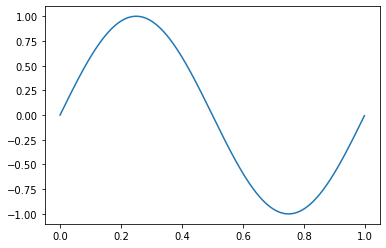

In [5]:
X, y = sine_data()
plt.plot(X,y)
plt.show()

In [29]:
# Dataset
X, y = sine_data()

# First Layer
dense1 = Dense(1, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)
activation1 = ReLU()

# Second Layer
dense2 = Dense(64, 64)
activation2 = ReLU()

dense3 = Dense(64, 1)
activation3 = Linear()

# Categorical-CrossEntropy with Activation
loss_function = MeanSquaredError()

# Optimizer
optimizer = Adam(learning_rate=0.005, decay=1e-3)

# Precision for accuracy computation
accuracy_precision = np.std(y) / 250

for epoch in range(10001):
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)
    
    # Loss Computation
    # Data
    data_loss = loss_function.calculate(activation3.output, y)
    
    # Regularization termr
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    
    # Total
    loss = data_loss + regularization_loss
    
    
    # Accuracy
    predictions = activation3.output
    acc = np.mean(np.absolute(predictions - y) < accuracy_precision)
    
    if not epoch % 1000:
        print(f'epoch: {epoch}, ' +
              f'acc: {acc:.3f}, ' +
              f'loss: {loss:.3f}, ' +
              f'data_loss: {data_loss:.3f} ' +
              f'reg_loss: {regularization_loss:.3f} ' +
              f'lr: {optimizer.current_learning_rate} ')

    # Backward Pass
    loss_function.backward(activation3.output, y)
    
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Optimize
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.003, loss: 0.497, data_loss: 0.496 reg_loss: 0.000 lr: 0.005 
epoch: 1000, acc: 0.456, loss: 0.003, data_loss: 0.000 reg_loss: 0.003 lr: 0.002501250625312656 
epoch: 2000, acc: 0.449, loss: 0.002, data_loss: 0.000 reg_loss: 0.002 lr: 0.0016672224074691564 
epoch: 3000, acc: 0.465, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.0012503125781445363 
epoch: 4000, acc: 0.454, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.0010002000400080014 
epoch: 5000, acc: 0.422, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.0008334722453742291 
epoch: 6000, acc: 0.475, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.000714387769681383 
epoch: 7000, acc: 0.460, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.0006250781347668457 
epoch: 8000, acc: 0.463, loss: 0.001, data_loss: 0.000 reg_loss: 0.001 lr: 0.00055561729081009 
epoch: 9000, acc: 0.532, loss: 0.001, data_loss: 0.000 reg_loss: 0.000 lr: 0.0005000500050005 
epoch: 10000, acc: 0.531, loss: 0.000, data_lo

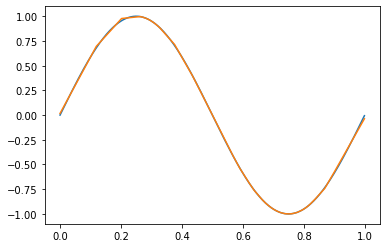

In [30]:
# Create test set
X_test, y_test = sine_data()


# Evaluate the model on test set
# Forward pass
dense1.forward(X_test)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

loss = loss_function.calculate(activation3.output, y_test)

# predictions = (activation2.output > 0.5) * 1
# acc = np.mean(predictions==y_test)

# print(f'Validation acc: {acc:.3f}, loss: {loss:.3f}')

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()

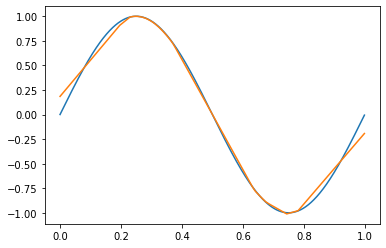

In [22]:
# Create test set
X_test, y_test = sine_data()


# Evaluate the model on test set
# Forward pass
dense1.forward(X_test)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

loss = loss_function.calculate(activation3.output, y_test)

# predictions = (activation2.output > 0.5) * 1
# acc = np.mean(predictions==y_test)

# print(f'Validation acc: {acc:.3f}, loss: {loss:.3f}')

plt.plot(X_test, y_test)
plt.plot(X_test, activation3.output)
plt.show()

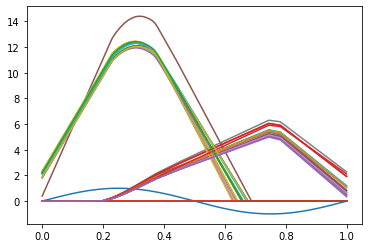

In [20]:
# Create test set
X_test, y_test = sine_data()


# Evaluate the model on test set
# Forward pass
dense1.forward(X_test)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

dense3.forward(activation2.output)
activation3.forward(dense3.output)

loss = loss_function.calculate(activation3.output, y_test)

# predictions = (activation2.output > 0.5) * 1
# acc = np.mean(predictions==y_test)

# print(f'Validation acc: {acc:.3f}, loss: {loss:.3f}')

plt.plot(X_test, y_test)
plt.plot(X_test, activation2.output)
plt.show()

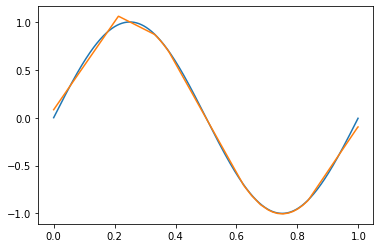

In [17]:
# Create test set
X_test, y_test = sine_data()


# Evaluate the model on test set
# Forward pass
dense1.forward(X_test)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y_test)

# predictions = (activation2.output > 0.5) * 1
# acc = np.mean(predictions==y_test)

# print(f'Validation acc: {acc:.3f}, loss: {loss:.3f}')

plt.plot(X_test, y_test)
plt.plot(X_test, activation2.output)
plt.show()